In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

In [2]:
# FashionMNIST 데이터셋 다운로드
train = torchvision.datasets.FashionMNIST(root='../PyTorch_Textbook_dataset', train=True,
                                          download=True,
                                          transform=transforms.ToTensor())

100.0%


Extracting ../PyTorch_Textbook_dataset\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../PyTorch_Textbook_dataset\FashionMNIST\raw



100.0%


Extracting ../PyTorch_Textbook_dataset\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../PyTorch_Textbook_dataset\FashionMNIST\raw



100.0%


Extracting ../PyTorch_Textbook_dataset\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../PyTorch_Textbook_dataset\FashionMNIST\raw



100.0%

Extracting ../PyTorch_Textbook_dataset\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../PyTorch_Textbook_dataset\FashionMNIST\raw



In [3]:
# 데이터셋을 메모리로 가져오기
batch_size = 4
trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

In [4]:
# 데이터셋을 이미지와 레이블로 분리
images, labels = next(iter(trainloader))

In [5]:
# 데이터셋에 대한 정보 확인
print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
6


In [6]:
# 이미지 데이터를 출력하기 위한 전처리
def imshow(img, title):
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [7]:
# 이미지 데이터 출력 함수
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

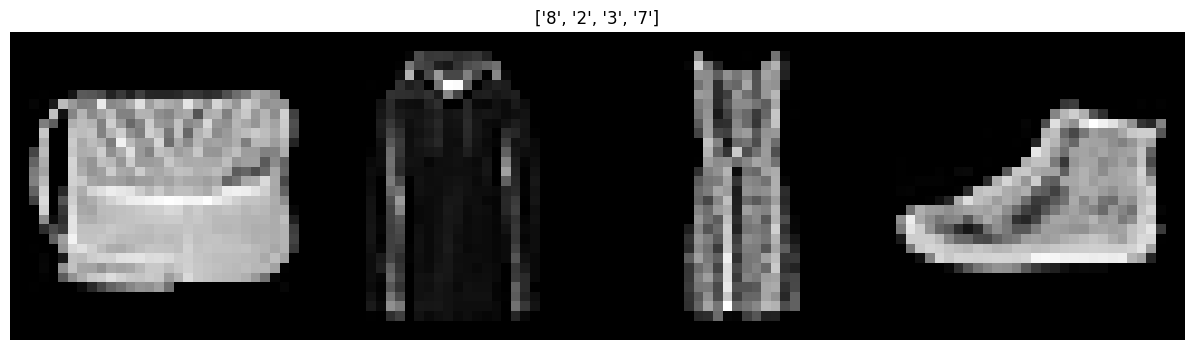

In [8]:
# 이미지 출력
images, labels = show_batch_images(trainloader)

In [9]:
# Batch Normalization가 적용되지 않은 네트워크
class NormalNet(nn.Module):
    def __init__(self):
        super(NormalNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10))
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [10]:
# Batch Normalization가 포함된 네트워크
class BNNet(nn.Module):
    def __init__(self):
        super(BNNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24, 10))
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [18]:
model = NormalNet()
print(model)

NormalNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [19]:
model_bn = BNNet()
print(model_bn)

BNNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [20]:
# 데이터셋 메모리로 불러오기
batch_size = 512
trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

In [21]:
# 옵티마이저, 손실함수 지정
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

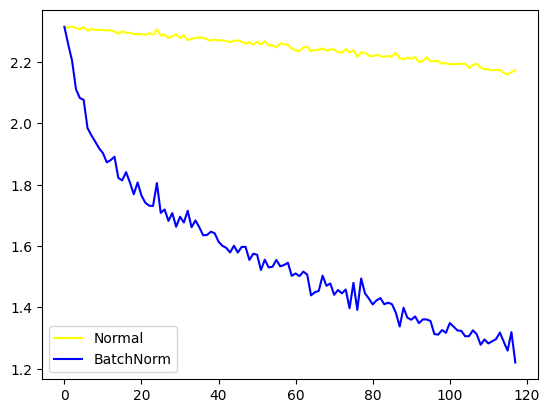

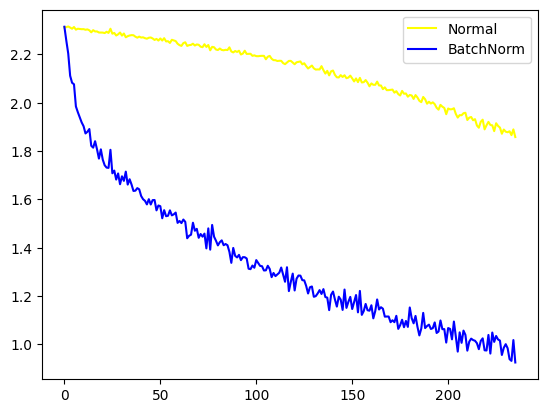

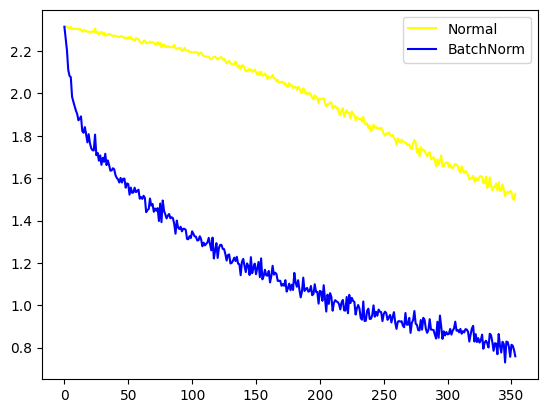

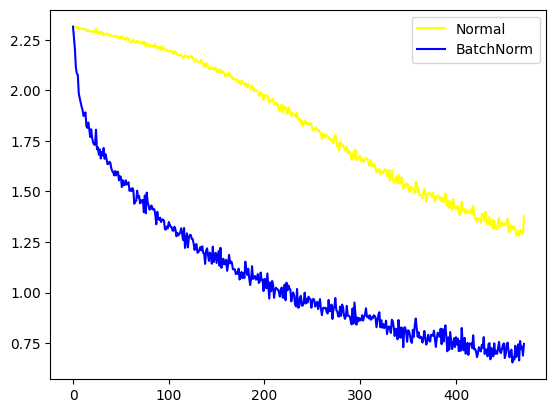

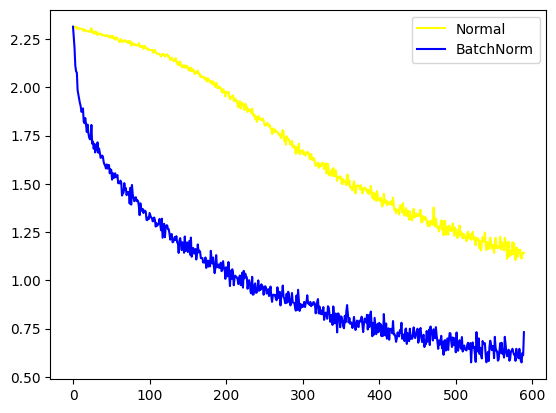

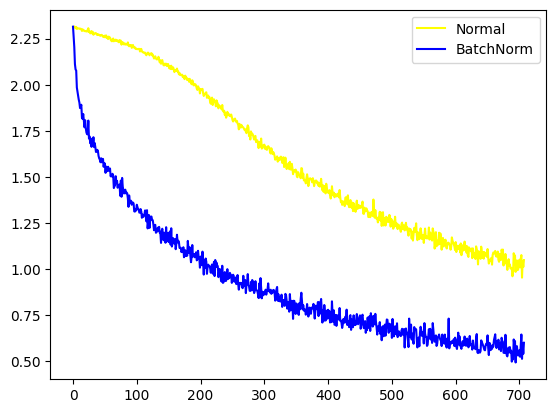

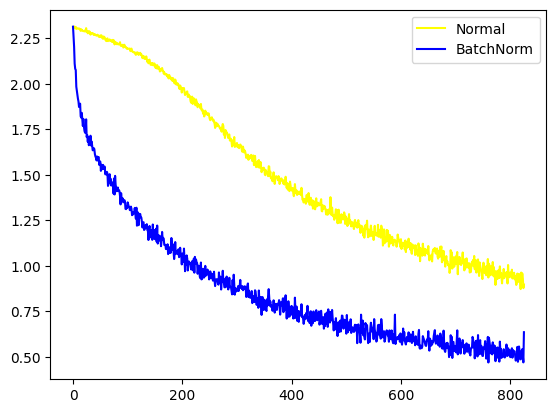

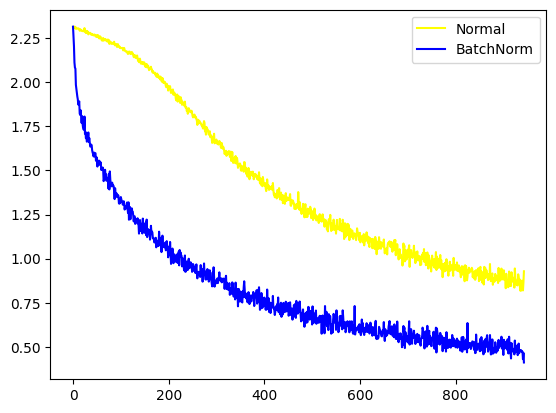

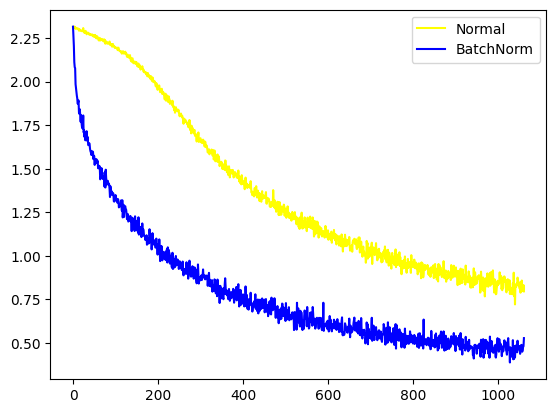

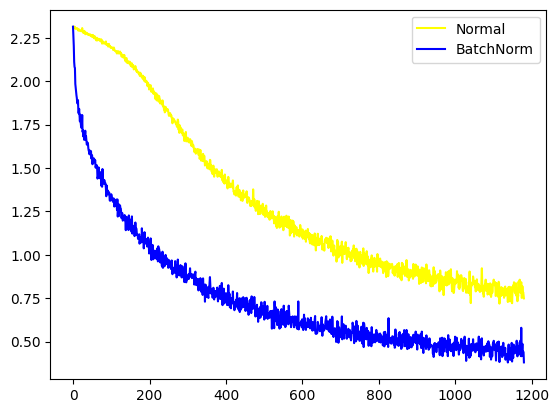

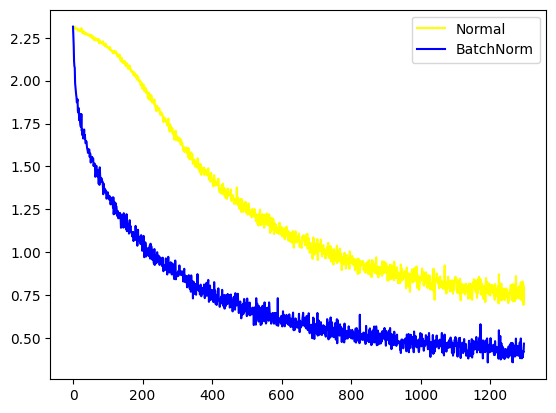

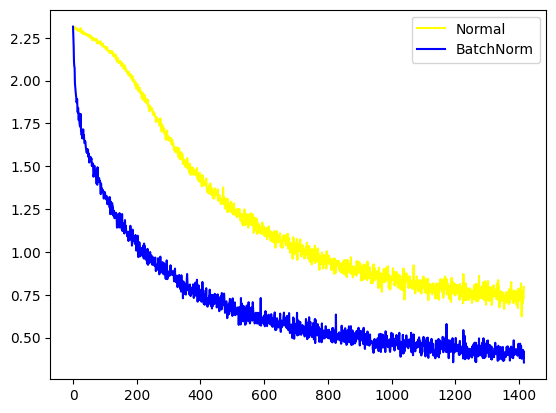

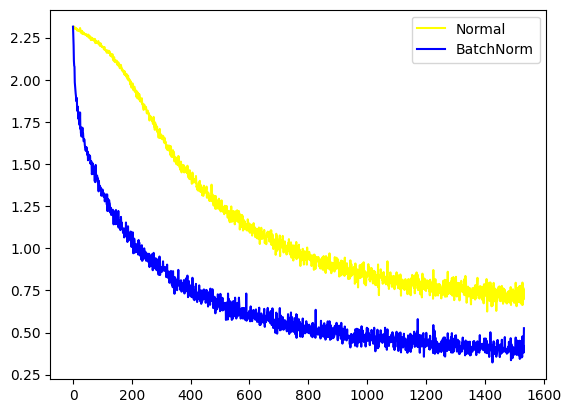

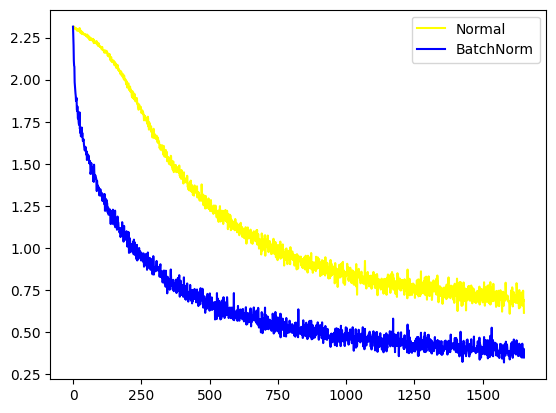

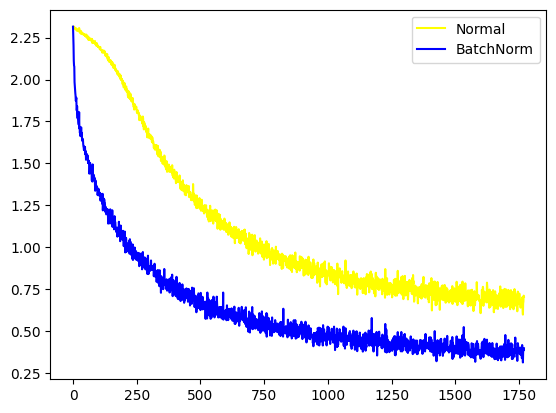

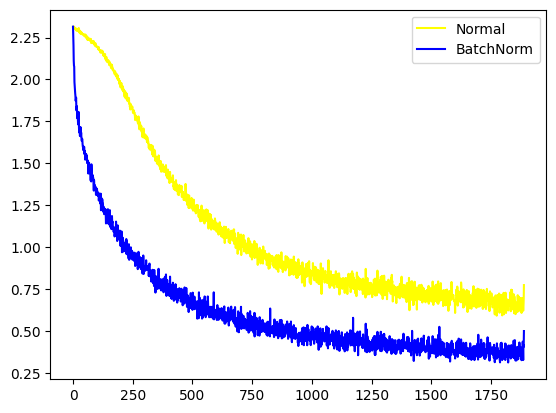

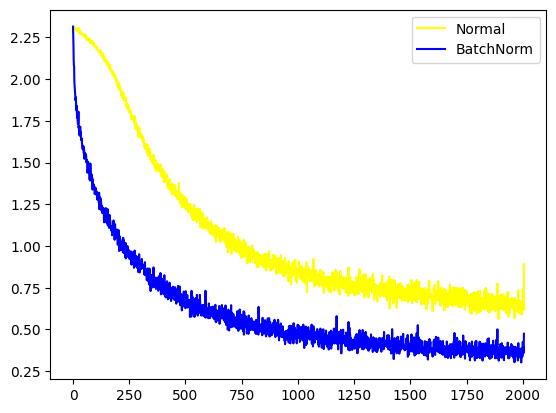

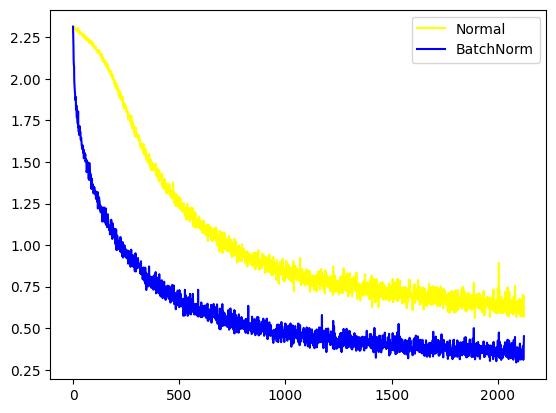

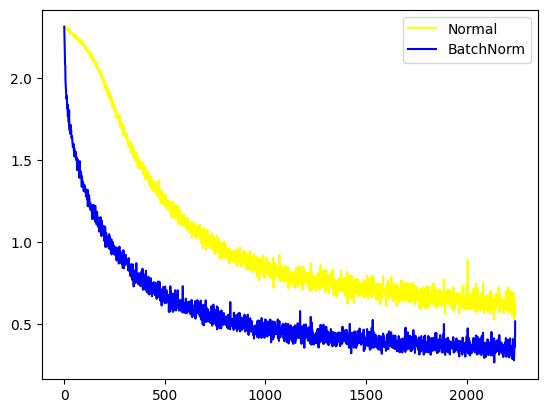

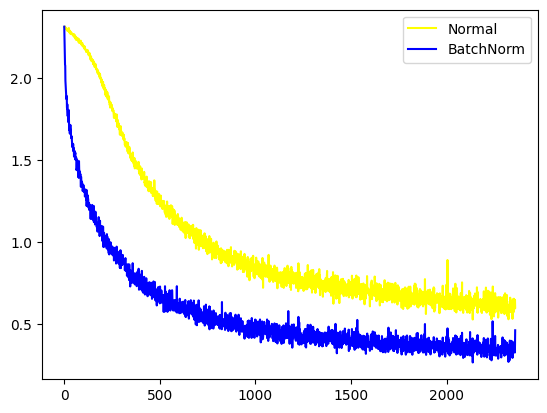

In [22]:
# 모델 학습
loss_arr = []
loss_bn_arr = []
max_epochs = 20

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad() # 배치 정규화가 적용되지 않은 모델의 학습
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        opt_bn.zero_grad() # 배치 정규화가 적용된 모델의 학습
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())
        
    plt.plot(loss_arr, 'yellow', label='Normal')
    plt.plot(loss_bn_arr, 'blue', label='BatchNorm')
    plt.legend()
    plt.show()

In [26]:
# 데이터셋의 분포를 출력하기 위한 전처리
N = 50
noise = 0.3

x_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_train = x_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

x_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_test = x_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

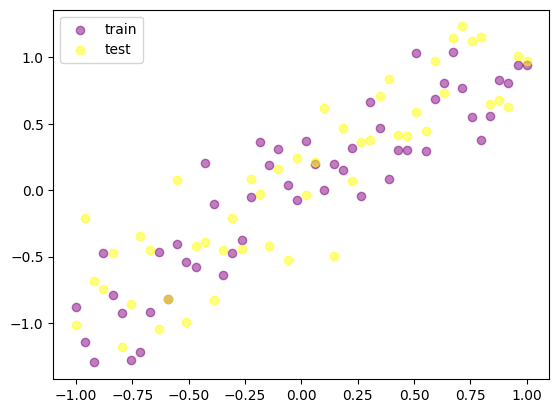

In [27]:
# 데이터 분포를 그래프로 출력
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='purple',
           alpha=0.5, label='train')
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='yellow',
           alpha=0.5, label='test')
plt.legend()
plt.show()

In [28]:
# 드롭아웃을 위한 모델 생성
N_h = 100
model = torch.nn.Sequential( # 드롭아웃을 적용하지 않은 모델
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1))

model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1))

In [29]:
# 옵티마이저, 손실함수 지정
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

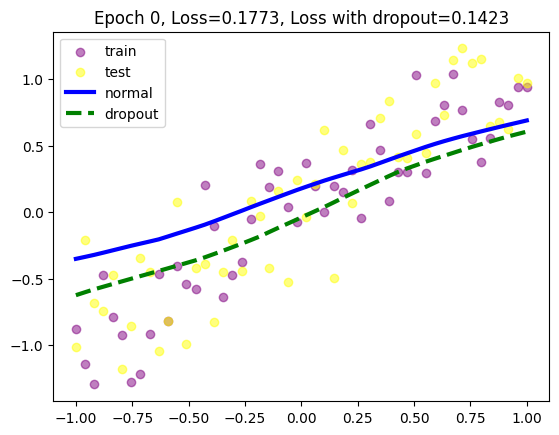

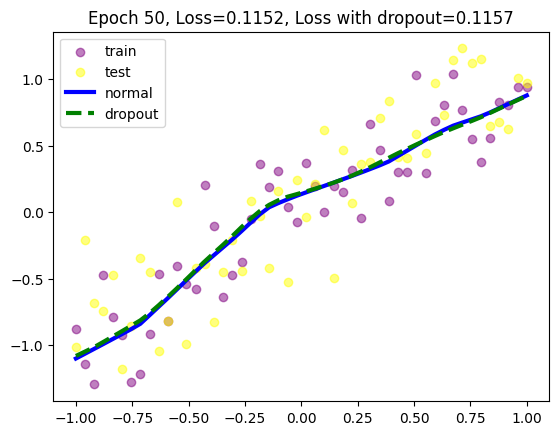

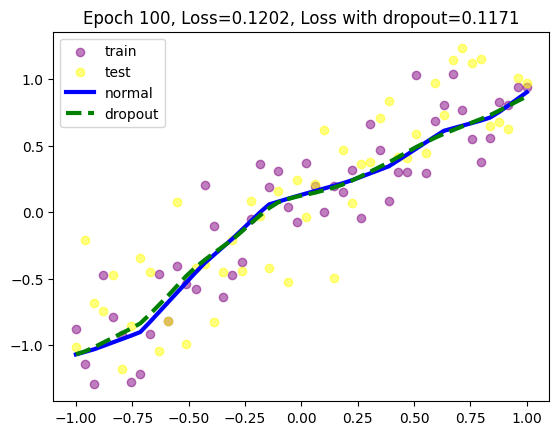

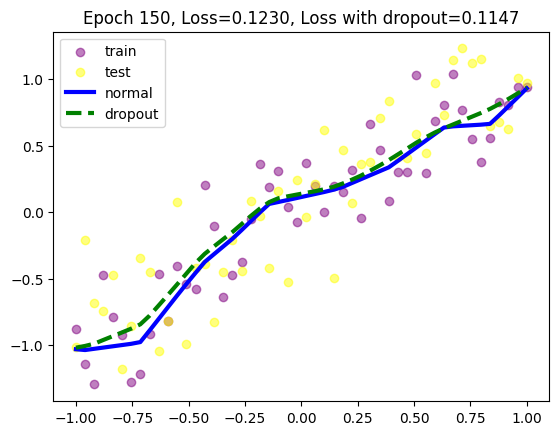

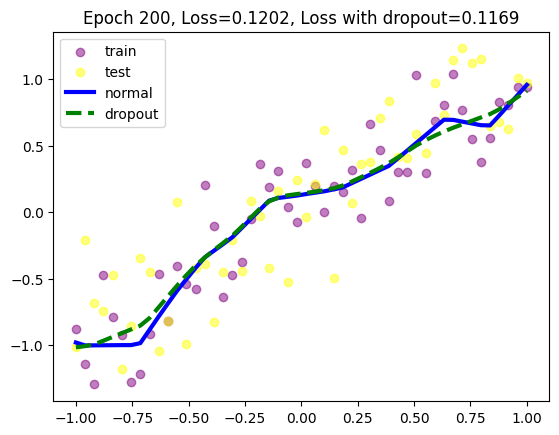

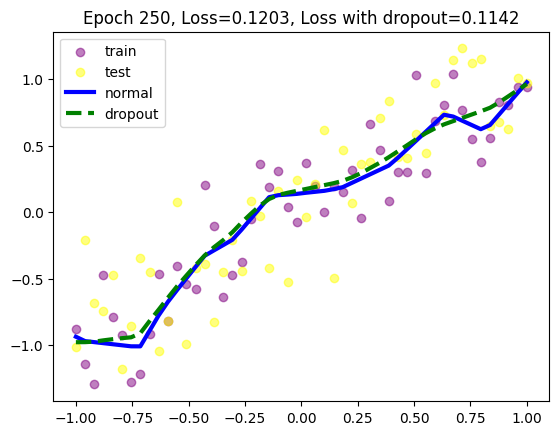

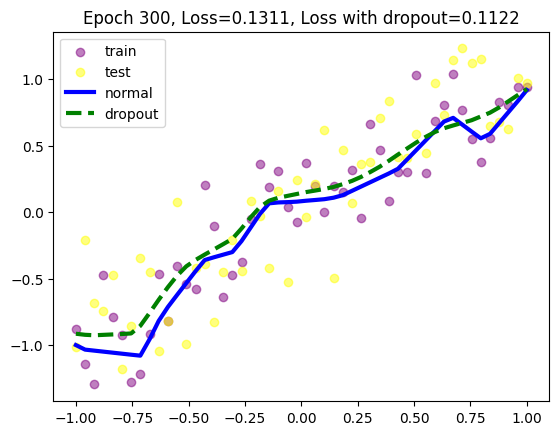

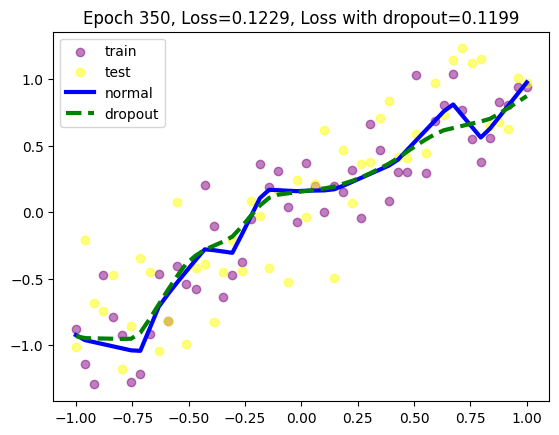

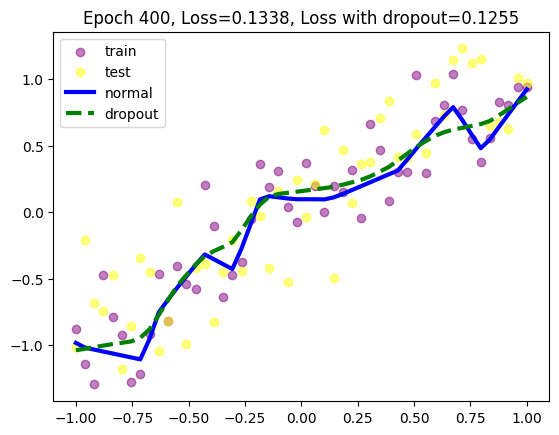

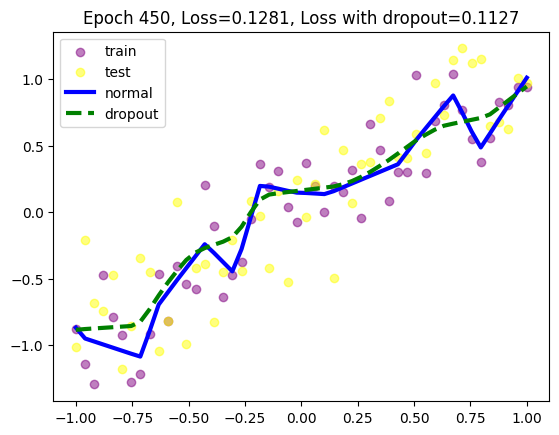

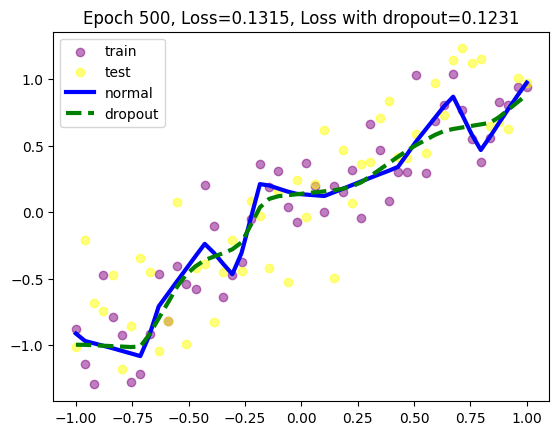

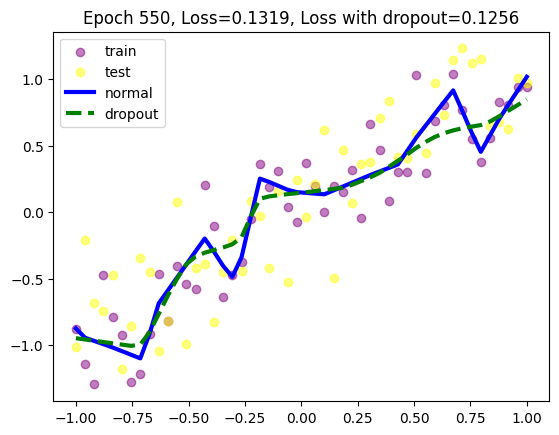

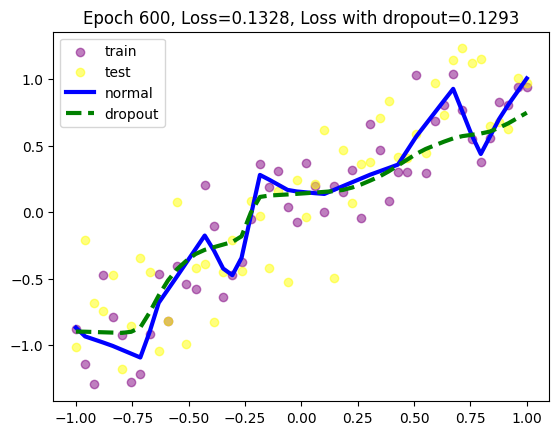

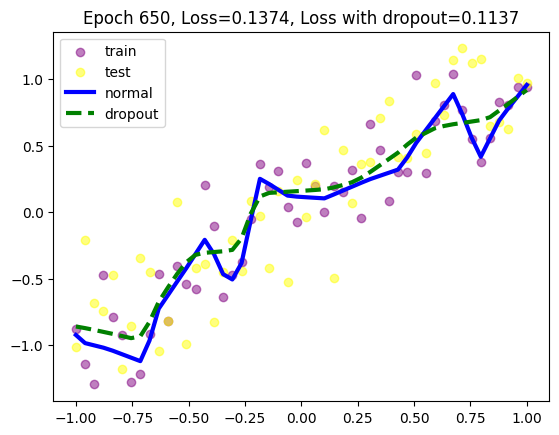

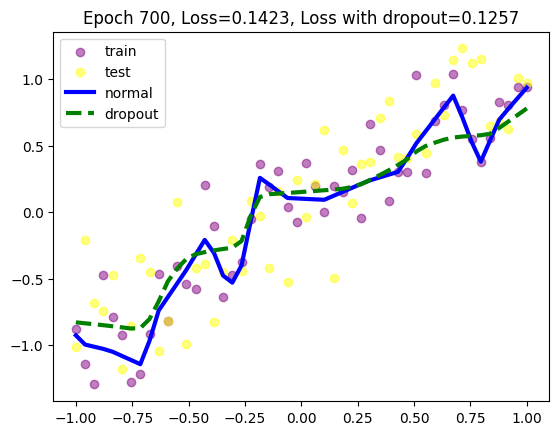

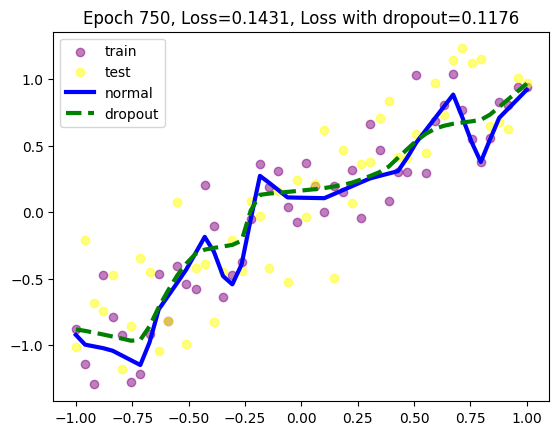

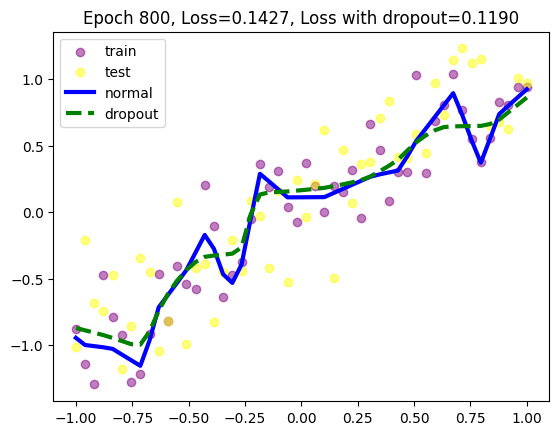

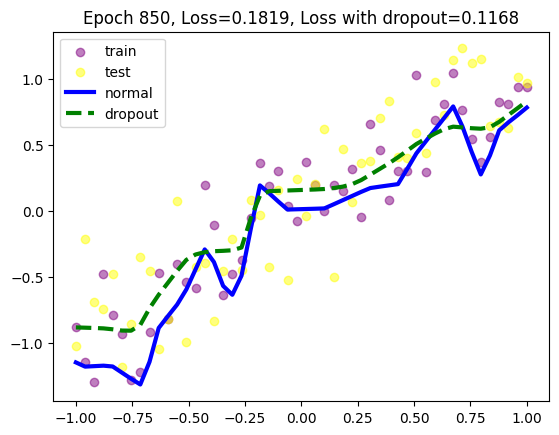

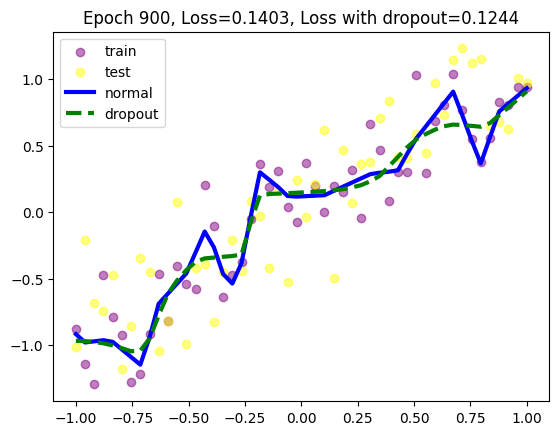

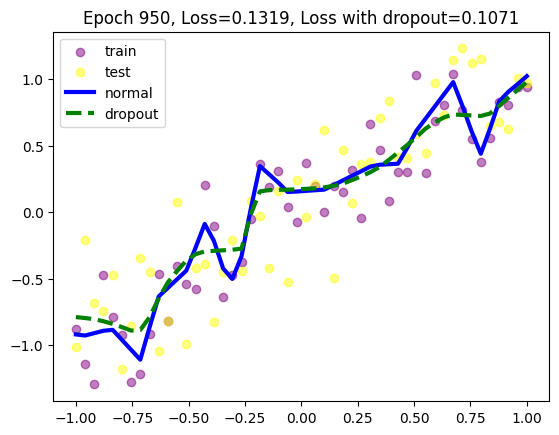

In [30]:
# 모델 학습
max_epochs = 1000
for epoch in range(max_epochs):
    pred = model(x_train) # 드롭아웃이 적용되지 않은 모델 학습
    loss = loss_fn(pred, y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    pred_dropout = model_dropout(x_train) # 드롭아웃이 적용된 모델 학습
    loss_dropout = loss_fn(pred_dropout, y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()
    
    if epoch % 50 == 0:
        model.eval()
        model_dropout.eval()
        
        test_pred = model(x_test)
        test_loss = loss_fn(test_pred, y_test)
        
        test_pred_dropout = model_dropout(x_test)
        test_loss_dropout = loss_fn(test_pred_dropout, y_test)
        
        plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='purple',
                   alpha=0.5, label='train')
        plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='yellow',
                   alpha=0.5, label='test')
        
        plt.plot(x_test.data.numpy(), test_pred.data.numpy(), 'b-', lw=3,
                label='normal')
        plt.plot(x_test.data.numpy(), test_pred_dropout.data.numpy(), 'g--', lw=3,
                label='dropout')
        
        plt.title('Epoch %d, Loss=%0.4f, Loss with dropout=%0.4f' % (epoch, test_loss, test_loss_dropout))
        plt.legend()
        
        model.train()
        model_dropout.train()
        plt.pause(0.05)